In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

import seaborn as sns
from datetime import * 

- 스마트서울 도시데이터 센서(S-DoT) 환경정보
- https://data.seoul.go.kr/dataList/OA-15969/S/1/datasetView.do#

# 미세먼지 데이터 불러오기

In [2]:
# train: 2022-01-01 00:00 ~ 2022-03-31 23:00 => 89일
# test: 2022-04-01 00:00 ~ 2022-04-30 23:00 => 29일
# print(date(2022,3,31) - date(2022,1,1))
# print(date(2022,4,30) - date(2022,4,1))

start = date(2021,12,27)

full_data = pd.DataFrame()
for i in range(0,130,7):
    try:
        s = start + timedelta(days=i)
        ss = s.strftime('%Y.%m.%d')    
        e = s + timedelta(days=6)
        ee = e.strftime('%m.%d')

        filename = 'S-DoT_NATURE_' + str(ss) + '-' + str(ee) + '.csv'
        data = pd.read_csv('./data/sdot_data/' + filename, encoding='cp949')
        print(filename)
        full_data = pd.concat([full_data, data], axis=0)
    except:
        pass

S-DoT_NATURE_2021.12.27-01.02.csv
S-DoT_NATURE_2022.01.03-01.09.csv
S-DoT_NATURE_2022.01.10-01.16.csv
S-DoT_NATURE_2022.01.17-01.23.csv
S-DoT_NATURE_2022.01.24-01.30.csv
S-DoT_NATURE_2022.01.31-02.06.csv
S-DoT_NATURE_2022.02.07-02.13.csv
S-DoT_NATURE_2022.02.14-02.20.csv
S-DoT_NATURE_2022.02.21-02.27.csv
S-DoT_NATURE_2022.02.28-03.06.csv
S-DoT_NATURE_2022.03.07-03.13.csv
S-DoT_NATURE_2022.03.14-03.20.csv
S-DoT_NATURE_2022.03.21-03.27.csv
S-DoT_NATURE_2022.03.28-04.03.csv
S-DoT_NATURE_2022.04.04-04.10.csv
S-DoT_NATURE_2022.04.11-04.17.csv
S-DoT_NATURE_2022.04.18-04.24.csv
S-DoT_NATURE_2022.04.25-05.01.csv


In [3]:
def prep(df):
    df.reset_index(drop=True, inplace=True)
    df1 = df.iloc[:,:-2]
    df1.columns = df.columns[2:]
    df1 = df1[['시리얼', '전송시간', '미세먼지 보정(㎍/㎥)']]
    df1.rename({'시리얼':'시리얼번호', '미세먼지 보정(㎍/㎥)':'미세먼지'}, axis=1, inplace=True)
    df1['전송시간'] = df1['전송시간'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d%H%M'))

    return df1

In [4]:
full_data

기관 명  모델명   시리얼    구분  초미세먼지(㎍/㎥)  미세먼지(㎍/㎥)  기온(℃)  \
서울시 SDOT001  OC3CL200025    1   7.0  10.0       -11.3       47.0    NaN   
    SDOT001  OC3CL200014    1   5.0   8.0       -10.2       44.0    NaN   
    SDOT001  OC3CL200023    1   7.0  10.0       -10.1       42.0    NaN   
    SDOT001  OC3CL200017    1  11.0  16.0       -10.2       42.0    NaN   
    SDOT001  OC3CL200021    1   8.0  13.0       -10.6       44.0    NaN   
...                  ...  ...   ...   ...         ...        ...    ...   
    SDOT001  V02Q1941006    1   2.0   4.0        13.3       71.0    NaN   
    SDOT001  V02Q1941000    1   4.0   5.0        13.1       71.0    NaN   
    SDOT001  V02Q1941013    1   3.0   3.0        13.5       70.0    NaN   
    SDOT001  V02Q1941015    1  15.0  15.0        13.3       68.0    NaN   
    SDOT001  V02Q1940954    1   8.0   8.0        13.4       64.0    NaN   

             상대습도( %)  풍향(°)  풍속(m/s)  ...  진동_y(g)  진동_z(g)  진동_x 최대(g)  \
서울시 SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
...               ...    ...      ...  ...      ...      ...         ...   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...      NaN      NaN         NaN   
    SDOT001       NaN    NaN      NaN  ...     0.11     0.14         1.1   

             진동_y 최대(g)  진동_z 최대(g)  흑구 운도(℃)  초미세먼지 보정(㎍/㎥)  \
서울시 SDOT001         NaN         8.0      14.0   202112262300   
    SDOT001       -11.1         7.0      12.0   202112262300   
    SDOT001         NaN         8.0      12.0   202112262300   
    SDOT001       -11.5        16.0      23.0   202112262300   
    SDOT001         NaN         8.0      15.0   202112262300   
...                 ...         ...       ...            ...   
    SDOT001         NaN         3.0       7.0   202205012200   
    SDOT001         NaN         8.0       9.0   202205012200   
    SDOT001         NaN         5.0       5.0   202205012200   
    SDOT001         NaN        14.0      26.0   202205012200   
    SDOT001         NaN        13.0      12.0   202205012200   

                    미세먼지 보정(㎍/㎥)  전송시간  등록일자  
서울시 SDOT001  2021-12-27 00:07:01   NaN   NaN  
    SDOT001  2021-12-27 00:07:01   NaN   NaN  
    SDOT001  2021-12-27 00:07:01   NaN   NaN  
    SDOT001  2021-12-27 00:07:01   NaN   NaN  
    SDOT001  2021-12-27 00:07:01   NaN   NaN  
...                          ...   ...   ...  
    SDOT001  2022-05-01 23:08:01   NaN   NaN  
    SDOT001  2022-05-01 23:08:01   NaN   NaN  
    SDOT001  2022-05-01 23:08:01   NaN   NaN  
    SDOT001  2022-05-01 23:08:01   NaN   NaN  
    SDOT001  2022-05-01 23:08:01   NaN   NaN  

[2756014 rows x 26 columns]

In [5]:
df = prep(full_data)

In [6]:
tmp = df.groupby(['시리얼번호']).count().sort_values(by='전송시간').reset_index()
serial = tmp.loc[tmp['전송시간']>2500, '시리얼번호'].tolist()
serial

['V02Q1940635',
 'V02Q1940525',
 'V02Q1940526',
 'V02Q1940355',
 'V02Q1940298',
 'OC3CL200184',
 'V02Q1940117',
 'V02Q1940745',
 'V02Q1940465',
 'V02Q1940735',
 'V02Q1940810',
 'V02Q1940097',
 'V02Q1940120',
 'V02Q1940836',
 'OC3CL200189',
 'OC3CL200241',
 'OC3CL200244',
 'V02Q1940609',
 'V02Q1940643',
 'V02Q1940549',
 'V02Q1940574',
 'OC3CL200227',
 'OC3CL200203',
 'V02Q1940164',
 'V02Q1940752',
 'OC3CL200192',
 'OC3CL200212',
 'V02Q1940718',
 'V02Q1940515',
 'V02Q1940716',
 'V02Q1940677',
 'OC3CL200206',
 'V02Q1940387',
 'V02Q1940312',
 'OC3CL200114',
 'V02Q1940779',
 'V02Q1940710',
 'OC3CL200159',
 'V02Q1940847',
 'V02Q1940124',
 'V02Q1940223',
 'V02Q1940116',
 'V02Q1940712',
 'V02Q1940464',
 'V02Q1940151',
 'V02Q1940420',
 'V02Q1940778',
 'OC3CL200202',
 'V02Q1940772',
 'V02Q1940376',
 'OC3CL200075',
 'V02Q1940755',
 'V02Q1940785',
 'V02Q1940477',
 'OC3CL200246',
 'V02Q1940732',
 'V02Q1940343',
 'V02Q1940633',
 'V02Q1940630',
 'V02Q1940161',
 'V02Q1940556',
 'V02Q1940527',
 'V02Q19

In [7]:
df = df[df['시리얼번호'].isin(serial)]

In [8]:
df

,시리얼번호,전송시간,미세먼지
1,OC3CL200014,2021-12-26 23:00:00,12.0
2,OC3CL200023,2021-12-26 23:00:00,12.0
3,OC3CL200017,2021-12-26 23:00:00,23.0
4,OC3CL200021,2021-12-26 23:00:00,15.0
5,OC3CL200019,2021-12-26 23:00:00,11.0
...,...,...,...
2756009,V02Q1941006,2022-05-01 22:00:00,7.0
2756010,V02Q1941000,2022-05-01 22:00:00,9.0
2756011,V02Q1941013,2022-05-01 22:00:00,5.0
2756012,V02Q1941015,2022-05-01 22:00:00,26.0


In [9]:
df['시리얼번호'].nunique()

680


### 위치정보 메타데이터

In [9]:
meta = pd.read_excel('./data/sdot_data/dust_location_meta.xlsx', sheet_name=1, header=3)
meta = meta.iloc[2:,1:9]
meta = meta[['시리얼번호','위도','경도']]
meta

,시리얼번호,위도,경도
2,V02Q1940059,37.489530,127.075346
3,V02Q1940293,37.476401,127.048489
4,V02Q1940060,37.483397,127.086234
5,V02Q1940079,37.494102,127.082209
6,V02Q1940129,37.497656,127.074399
...,...,...,...
1122,OC3CL210107,37.528351,127.130989
1123,OC3CL210115,37.525606,127.129661
1124,OC3CL200223,37.502652,126.981051
1125,OC3CL200224,37.499757,126.991072


## 시간 단위 확인

In [10]:
# train: 2022-01-01 00:00 ~ 2022-03-31 23:00 => 90일
# test: 2022-04-01 00:00 ~ 2022-04-30 23:00 => 30일

train_start = datetime(2022,1,1,0,0)
train_end = datetime(2022,3,31,23,0)

train_time_list = []
for i in range(90*24):
    t = train_start + timedelta(hours=i)
    print(t)
    train_time_list.append(t)


test_start = datetime(2022,4,1,0,0)
test_end = datetime(2022,4,30,23,0)

test_time_list = []
for i in range(30*24):
    t = test_start + timedelta(hours=i)
    print(t)
    test_time_list.append(t)

2022-01-01 00:00:00
2022-01-01 01:00:00
2022-01-01 02:00:00
2022-01-01 03:00:00
2022-01-01 04:00:00
2022-01-01 05:00:00
2022-01-01 06:00:00
2022-01-01 07:00:00
2022-01-01 08:00:00
2022-01-01 09:00:00
2022-01-01 10:00:00
2022-01-01 11:00:00
2022-01-01 12:00:00
2022-01-01 13:00:00
2022-01-01 14:00:00
2022-01-01 15:00:00
2022-01-01 16:00:00
2022-01-01 17:00:00
2022-01-01 18:00:00
2022-01-01 19:00:00
2022-01-01 20:00:00
2022-01-01 21:00:00
2022-01-01 22:00:00
2022-01-01 23:00:00
2022-01-02 00:00:00
2022-01-02 01:00:00
2022-01-02 02:00:00
2022-01-02 03:00:00
2022-01-02 04:00:00
2022-01-02 05:00:00
2022-01-02 06:00:00
2022-01-02 07:00:00
2022-01-02 08:00:00
2022-01-02 09:00:00
2022-01-02 10:00:00
2022-01-02 11:00:00
2022-01-02 12:00:00
2022-01-02 13:00:00
2022-01-02 14:00:00
2022-01-02 15:00:00
2022-01-02 16:00:00
2022-01-02 17:00:00
2022-01-02 18:00:00
2022-01-02 19:00:00
2022-01-02 20:00:00
2022-01-02 21:00:00
2022-01-02 22:00:00
2022-01-02 23:00:00
2022-01-03 00:00:00
2022-01-03 01:00:00


In [11]:
# train test split
df_train = df[(df['전송시간'] >= train_start) & (df['전송시간'] <= train_end)]
df_test = df[(df['전송시간'] >= test_start) & (df['전송시간'] <= test_end)]

In [12]:
df_train

,시리얼번호,전송시간,미세먼지
122757,OC3CL200012,2022-01-01 00:00:00,11.0
122758,OC3CL200011,2022-01-01 00:00:00,12.0
122759,OC3CL200013,2022-01-01 00:00:00,16.0
122760,OC3CL200016,2022-01-01 00:00:00,12.0
122761,OC3CL200014,2022-01-01 00:00:00,12.0
...,...,...,...
2131397,V02Q1940951,2022-03-31 22:00:00,0.0
2131398,V02Q1940954,2022-03-31 22:00:00,8.0
2131399,V02Q1940955,2022-03-31 22:00:00,0.0
2131400,V02Q1940953,2022-03-31 22:00:00,0.0


In [13]:
def fill_missing(df1, time_list):
    df2 = pd.DataFrame()

    for num in df1['시리얼번호'].unique():

        temp = df1[df1['시리얼번호']==num]
        df_time = pd.DataFrame({'전송시간':time_list})
        temp2 = pd.merge(temp, df_time, on='전송시간', how='right')
        temp2['시리얼번호'] = temp2['시리얼번호'].fillna(num)
        temp2 = temp2.drop_duplicates(['전송시간'], keep='first')

        # 시계열 보간법으로 미세먼지 결측값 채우기
        temp2['미세먼지'] = pd.Series(temp2['미세먼지'].tolist(), index=temp2['전송시간']).interpolate(method='time').tolist()
        temp2['미세먼지'] = temp2['미세먼지'].ffill()
        temp2['미세먼지'] = temp2['미세먼지'].bfill()
        df2 = pd.concat([df2, temp2], axis=0)
    df2 = df2.dropna()
    return df2

In [14]:
df_train1 = fill_missing(df_train, train_time_list)
df_train1

,시리얼번호,전송시간,미세먼지
0,OC3CL200012,2022-01-01 00:00:00,11.0
1,OC3CL200012,2022-01-01 01:00:00,13.0
2,OC3CL200012,2022-01-01 02:00:00,15.5
3,OC3CL200012,2022-01-01 03:00:00,18.0
4,OC3CL200012,2022-01-01 04:00:00,13.0
...,...,...,...
2155,V02Q1941013,2022-03-31 19:00:00,0.0
2156,V02Q1941013,2022-03-31 20:00:00,0.0
2157,V02Q1941013,2022-03-31 21:00:00,0.0
2158,V02Q1941013,2022-03-31 22:00:00,0.0


In [15]:
df_test1 = fill_missing(df_test, test_time_list)
df_test1

,시리얼번호,전송시간,미세먼지
0,OC3CL200022,2022-04-01 00:00:00,0.00
1,OC3CL200022,2022-04-01 01:00:00,0.00
2,OC3CL200022,2022-04-01 02:00:00,0.00
3,OC3CL200022,2022-04-01 03:00:00,0.00
4,OC3CL200022,2022-04-01 04:00:00,0.00
...,...,...,...
715,V02Q1940854,2022-04-30 19:00:00,39.04
716,V02Q1940854,2022-04-30 20:00:00,39.28
717,V02Q1940854,2022-04-30 21:00:00,39.52
718,V02Q1940854,2022-04-30 22:00:00,39.76


## 위치정보와 합치기

In [16]:
df_train2 = pd.merge(df_train1, meta, on=['시리얼번호'], how='left')
df_train2 = df_train2.dropna()

df_test2 = pd.merge(df_test1, meta, on=['시리얼번호'], how='left')
df_test2 = df_test2.dropna()

In [17]:
df_train2.to_csv('df_train_dust.csv', index=False)
df_test2.to_csv('df_test_dust.csv', index=False)

## 이미지 데이터로 재구조화

In [18]:
max_lat = df_train2['위도'].max() ; print(max_lat)
min_lat = df_train2['위도'].min() ; print(min_lat)
unit_lat = (max_lat - min_lat)/10 ; print(unit_lat)

max_long = df_train2['경도'].max() ; print(max_long)
min_long = df_train2['경도'].min(); print(min_long)
unit_long = (max_long - min_long)/20 ; print(unit_long)

lat_list = []
lat = min_lat
for _ in range(11):
    lat_list.append(lat)
    lat += unit_lat
print(lat_list)

long_list = []
long = min_long
for _ in range(21):
    long_list.append(long)
    long += unit_long
print(long_list)

37.690991222
37.42201307
0.02689781520000025
127.1787659
126.815190398
0.018178775100000166
[37.42201307, 37.4489108852, 37.4758087004, 37.5027065156, 37.529604330800005, 37.55650214600001, 37.58339996120001, 37.61029777640001, 37.63719559160001, 37.66409340680001, 37.690991222000015]
[126.815190398, 126.8333691731, 126.8515479482, 126.86972672329999, 126.88790549839999, 126.90608427349999, 126.92426304859998, 126.94244182369998, 126.96062059879998, 126.97879937389997, 126.99697814899997, 127.01515692409997, 127.03333569919997, 127.05151447429996, 127.06969324939996, 127.08787202449996, 127.10605079959996, 127.12422957469995, 127.14240834979995, 127.16058712489995, 127.17876589999995]


In [19]:
df_train = df_train2.copy()

num_days = 90
num_hours = 24 * num_days

train_image = np.zeros(shape=(num_hours,10,20))

for k in range(num_hours):
    target_datetime = train_start + timedelta(hours=k)
    print(target_datetime)
    tmp = df_train[df_train['전송시간'] == target_datetime]
    
    for i in range(10):
        a = (tmp['위도'] >= lat_list[i]) & (tmp['위도'] <= lat_list[i+1])
        
        for j in range(20):
            b = (tmp['경도'] >= long_list[j]) & (tmp['경도'] <= long_list[j+1])
            if len(tmp.loc[a&b,'미세먼지']) > 0:
                val = tmp.loc[a&b,'미세먼지'].mean()
                train_image[k][i][j] = val

2022-01-01 00:00:00
2022-01-01 01:00:00
2022-01-01 02:00:00
2022-01-01 03:00:00
2022-01-01 04:00:00
2022-01-01 05:00:00
2022-01-01 06:00:00
2022-01-01 07:00:00
2022-01-01 08:00:00
2022-01-01 09:00:00
2022-01-01 10:00:00
2022-01-01 11:00:00
2022-01-01 12:00:00
2022-01-01 13:00:00
2022-01-01 14:00:00
2022-01-01 15:00:00
2022-01-01 16:00:00
2022-01-01 17:00:00
2022-01-01 18:00:00
2022-01-01 19:00:00
2022-01-01 20:00:00
2022-01-01 21:00:00
2022-01-01 22:00:00
2022-01-01 23:00:00
2022-01-02 00:00:00
2022-01-02 01:00:00
2022-01-02 02:00:00
2022-01-02 03:00:00
2022-01-02 04:00:00
2022-01-02 05:00:00
2022-01-02 06:00:00
2022-01-02 07:00:00
2022-01-02 08:00:00
2022-01-02 09:00:00
2022-01-02 10:00:00
2022-01-02 11:00:00
2022-01-02 12:00:00
2022-01-02 13:00:00
2022-01-02 14:00:00
2022-01-02 15:00:00
2022-01-02 16:00:00
2022-01-02 17:00:00
2022-01-02 18:00:00
2022-01-02 19:00:00
2022-01-02 20:00:00
2022-01-02 21:00:00
2022-01-02 22:00:00
2022-01-02 23:00:00
2022-01-03 00:00:00
2022-01-03 01:00:00


2022-01-18 02:00:00
2022-01-18 03:00:00
2022-01-18 04:00:00
2022-01-18 05:00:00
2022-01-18 06:00:00
2022-01-18 07:00:00
2022-01-18 08:00:00
2022-01-18 09:00:00
2022-01-18 10:00:00
2022-01-18 11:00:00
2022-01-18 12:00:00
2022-01-18 13:00:00
2022-01-18 14:00:00
2022-01-18 15:00:00
2022-01-18 16:00:00
2022-01-18 17:00:00
2022-01-18 18:00:00
2022-01-18 19:00:00
2022-01-18 20:00:00
2022-01-18 21:00:00
2022-01-18 22:00:00
2022-01-18 23:00:00
2022-01-19 00:00:00
2022-01-19 01:00:00
2022-01-19 02:00:00
2022-01-19 03:00:00
2022-01-19 04:00:00
2022-01-19 05:00:00
2022-01-19 06:00:00
2022-01-19 07:00:00
2022-01-19 08:00:00
2022-01-19 09:00:00
2022-01-19 10:00:00
2022-01-19 11:00:00
2022-01-19 12:00:00
2022-01-19 13:00:00
2022-01-19 14:00:00
2022-01-19 15:00:00
2022-01-19 16:00:00
2022-01-19 17:00:00
2022-01-19 18:00:00
2022-01-19 19:00:00
2022-01-19 20:00:00
2022-01-19 21:00:00
2022-01-19 22:00:00
2022-01-19 23:00:00
2022-01-20 00:00:00
2022-01-20 01:00:00
2022-01-20 02:00:00
2022-01-20 03:00:00


2022-02-04 04:00:00
2022-02-04 05:00:00
2022-02-04 06:00:00
2022-02-04 07:00:00
2022-02-04 08:00:00
2022-02-04 09:00:00
2022-02-04 10:00:00
2022-02-04 11:00:00
2022-02-04 12:00:00
2022-02-04 13:00:00
2022-02-04 14:00:00
2022-02-04 15:00:00
2022-02-04 16:00:00
2022-02-04 17:00:00
2022-02-04 18:00:00
2022-02-04 19:00:00
2022-02-04 20:00:00
2022-02-04 21:00:00
2022-02-04 22:00:00
2022-02-04 23:00:00
2022-02-05 00:00:00
2022-02-05 01:00:00
2022-02-05 02:00:00
2022-02-05 03:00:00
2022-02-05 04:00:00
2022-02-05 05:00:00
2022-02-05 06:00:00
2022-02-05 07:00:00
2022-02-05 08:00:00
2022-02-05 09:00:00
2022-02-05 10:00:00
2022-02-05 11:00:00
2022-02-05 12:00:00
2022-02-05 13:00:00
2022-02-05 14:00:00
2022-02-05 15:00:00
2022-02-05 16:00:00
2022-02-05 17:00:00
2022-02-05 18:00:00
2022-02-05 19:00:00
2022-02-05 20:00:00
2022-02-05 21:00:00
2022-02-05 22:00:00
2022-02-05 23:00:00
2022-02-06 00:00:00
2022-02-06 01:00:00
2022-02-06 02:00:00
2022-02-06 03:00:00
2022-02-06 04:00:00
2022-02-06 05:00:00


2022-02-21 06:00:00
2022-02-21 07:00:00
2022-02-21 08:00:00
2022-02-21 09:00:00
2022-02-21 10:00:00
2022-02-21 11:00:00
2022-02-21 12:00:00
2022-02-21 13:00:00
2022-02-21 14:00:00
2022-02-21 15:00:00
2022-02-21 16:00:00
2022-02-21 17:00:00
2022-02-21 18:00:00
2022-02-21 19:00:00
2022-02-21 20:00:00
2022-02-21 21:00:00
2022-02-21 22:00:00
2022-02-21 23:00:00
2022-02-22 00:00:00
2022-02-22 01:00:00
2022-02-22 02:00:00
2022-02-22 03:00:00
2022-02-22 04:00:00
2022-02-22 05:00:00
2022-02-22 06:00:00
2022-02-22 07:00:00
2022-02-22 08:00:00
2022-02-22 09:00:00
2022-02-22 10:00:00
2022-02-22 11:00:00
2022-02-22 12:00:00
2022-02-22 13:00:00
2022-02-22 14:00:00
2022-02-22 15:00:00
2022-02-22 16:00:00
2022-02-22 17:00:00
2022-02-22 18:00:00
2022-02-22 19:00:00
2022-02-22 20:00:00
2022-02-22 21:00:00
2022-02-22 22:00:00
2022-02-22 23:00:00
2022-02-23 00:00:00
2022-02-23 01:00:00
2022-02-23 02:00:00
2022-02-23 03:00:00
2022-02-23 04:00:00
2022-02-23 05:00:00
2022-02-23 06:00:00
2022-02-23 07:00:00


2022-03-10 08:00:00
2022-03-10 09:00:00
2022-03-10 10:00:00
2022-03-10 11:00:00
2022-03-10 12:00:00
2022-03-10 13:00:00
2022-03-10 14:00:00
2022-03-10 15:00:00
2022-03-10 16:00:00
2022-03-10 17:00:00
2022-03-10 18:00:00
2022-03-10 19:00:00
2022-03-10 20:00:00
2022-03-10 21:00:00
2022-03-10 22:00:00
2022-03-10 23:00:00
2022-03-11 00:00:00
2022-03-11 01:00:00
2022-03-11 02:00:00
2022-03-11 03:00:00
2022-03-11 04:00:00
2022-03-11 05:00:00
2022-03-11 06:00:00
2022-03-11 07:00:00
2022-03-11 08:00:00
2022-03-11 09:00:00
2022-03-11 10:00:00
2022-03-11 11:00:00
2022-03-11 12:00:00
2022-03-11 13:00:00
2022-03-11 14:00:00
2022-03-11 15:00:00
2022-03-11 16:00:00
2022-03-11 17:00:00
2022-03-11 18:00:00
2022-03-11 19:00:00
2022-03-11 20:00:00
2022-03-11 21:00:00
2022-03-11 22:00:00
2022-03-11 23:00:00
2022-03-12 00:00:00
2022-03-12 01:00:00
2022-03-12 02:00:00
2022-03-12 03:00:00
2022-03-12 04:00:00
2022-03-12 05:00:00
2022-03-12 06:00:00
2022-03-12 07:00:00
2022-03-12 08:00:00
2022-03-12 09:00:00


2022-03-27 10:00:00
2022-03-27 11:00:00
2022-03-27 12:00:00
2022-03-27 13:00:00
2022-03-27 14:00:00
2022-03-27 15:00:00
2022-03-27 16:00:00
2022-03-27 17:00:00
2022-03-27 18:00:00
2022-03-27 19:00:00
2022-03-27 20:00:00
2022-03-27 21:00:00
2022-03-27 22:00:00
2022-03-27 23:00:00
2022-03-28 00:00:00
2022-03-28 01:00:00
2022-03-28 02:00:00
2022-03-28 03:00:00
2022-03-28 04:00:00
2022-03-28 05:00:00
2022-03-28 06:00:00
2022-03-28 07:00:00
2022-03-28 08:00:00
2022-03-28 09:00:00
2022-03-28 10:00:00
2022-03-28 11:00:00
2022-03-28 12:00:00
2022-03-28 13:00:00
2022-03-28 14:00:00
2022-03-28 15:00:00
2022-03-28 16:00:00
2022-03-28 17:00:00
2022-03-28 18:00:00
2022-03-28 19:00:00
2022-03-28 20:00:00
2022-03-28 21:00:00
2022-03-28 22:00:00
2022-03-28 23:00:00
2022-03-29 00:00:00
2022-03-29 01:00:00
2022-03-29 02:00:00
2022-03-29 03:00:00
2022-03-29 04:00:00
2022-03-29 05:00:00
2022-03-29 06:00:00
2022-03-29 07:00:00
2022-03-29 08:00:00
2022-03-29 09:00:00
2022-03-29 10:00:00
2022-03-29 11:00:00


In [20]:
df_test = df_test2.copy()

num_days = 30
num_hours = 24 * num_days

test_image = np.zeros(shape=(num_hours,10,20))

for k in range(num_hours):
    target_datetime = test_start + timedelta(hours=k)
    print(target_datetime)
    tmp = df_test[df_test['전송시간'] == target_datetime]
    
    for i in range(10):
        a = (tmp['위도'] >= lat_list[i]) & (tmp['위도'] <= lat_list[i+1])
        
        for j in range(20):
            b = (tmp['경도'] >= long_list[j]) & (tmp['경도'] <= long_list[j+1])
            if len(tmp.loc[a&b,'미세먼지']) > 0:
                val = tmp.loc[a&b,'미세먼지'].mean()
                test_image[k][i][j] = val

2022-04-01 00:00:00
2022-04-01 01:00:00
2022-04-01 02:00:00
2022-04-01 03:00:00
2022-04-01 04:00:00
2022-04-01 05:00:00
2022-04-01 06:00:00
2022-04-01 07:00:00
2022-04-01 08:00:00
2022-04-01 09:00:00
2022-04-01 10:00:00
2022-04-01 11:00:00
2022-04-01 12:00:00
2022-04-01 13:00:00
2022-04-01 14:00:00
2022-04-01 15:00:00
2022-04-01 16:00:00
2022-04-01 17:00:00
2022-04-01 18:00:00
2022-04-01 19:00:00
2022-04-01 20:00:00
2022-04-01 21:00:00
2022-04-01 22:00:00
2022-04-01 23:00:00
2022-04-02 00:00:00
2022-04-02 01:00:00
2022-04-02 02:00:00
2022-04-02 03:00:00
2022-04-02 04:00:00
2022-04-02 05:00:00
2022-04-02 06:00:00
2022-04-02 07:00:00
2022-04-02 08:00:00
2022-04-02 09:00:00
2022-04-02 10:00:00
2022-04-02 11:00:00
2022-04-02 12:00:00
2022-04-02 13:00:00
2022-04-02 14:00:00
2022-04-02 15:00:00
2022-04-02 16:00:00
2022-04-02 17:00:00
2022-04-02 18:00:00
2022-04-02 19:00:00
2022-04-02 20:00:00
2022-04-02 21:00:00
2022-04-02 22:00:00
2022-04-02 23:00:00
2022-04-03 00:00:00
2022-04-03 01:00:00


2022-04-18 02:00:00
2022-04-18 03:00:00
2022-04-18 04:00:00
2022-04-18 05:00:00
2022-04-18 06:00:00
2022-04-18 07:00:00
2022-04-18 08:00:00
2022-04-18 09:00:00
2022-04-18 10:00:00
2022-04-18 11:00:00
2022-04-18 12:00:00
2022-04-18 13:00:00
2022-04-18 14:00:00
2022-04-18 15:00:00
2022-04-18 16:00:00
2022-04-18 17:00:00
2022-04-18 18:00:00
2022-04-18 19:00:00
2022-04-18 20:00:00
2022-04-18 21:00:00
2022-04-18 22:00:00
2022-04-18 23:00:00
2022-04-19 00:00:00
2022-04-19 01:00:00
2022-04-19 02:00:00
2022-04-19 03:00:00
2022-04-19 04:00:00
2022-04-19 05:00:00
2022-04-19 06:00:00
2022-04-19 07:00:00
2022-04-19 08:00:00
2022-04-19 09:00:00
2022-04-19 10:00:00
2022-04-19 11:00:00
2022-04-19 12:00:00
2022-04-19 13:00:00
2022-04-19 14:00:00
2022-04-19 15:00:00
2022-04-19 16:00:00
2022-04-19 17:00:00
2022-04-19 18:00:00
2022-04-19 19:00:00
2022-04-19 20:00:00
2022-04-19 21:00:00
2022-04-19 22:00:00
2022-04-19 23:00:00
2022-04-20 00:00:00
2022-04-20 01:00:00
2022-04-20 02:00:00
2022-04-20 03:00:00


In [2]:
print(train_image.shape)
print(test_image.shape)

NameError: name 'train_image' is not defined

In [3]:
train_image = np.load('./data/train_image_dust.npy')
train_image.shape

(2160, 10, 20)

In [4]:
train_image_new = train_image.copy()
for i in range(10):
    train_image_new[:,i,:] = train_image[:,9-i,:]

In [5]:
train_image = train_image_new.copy()

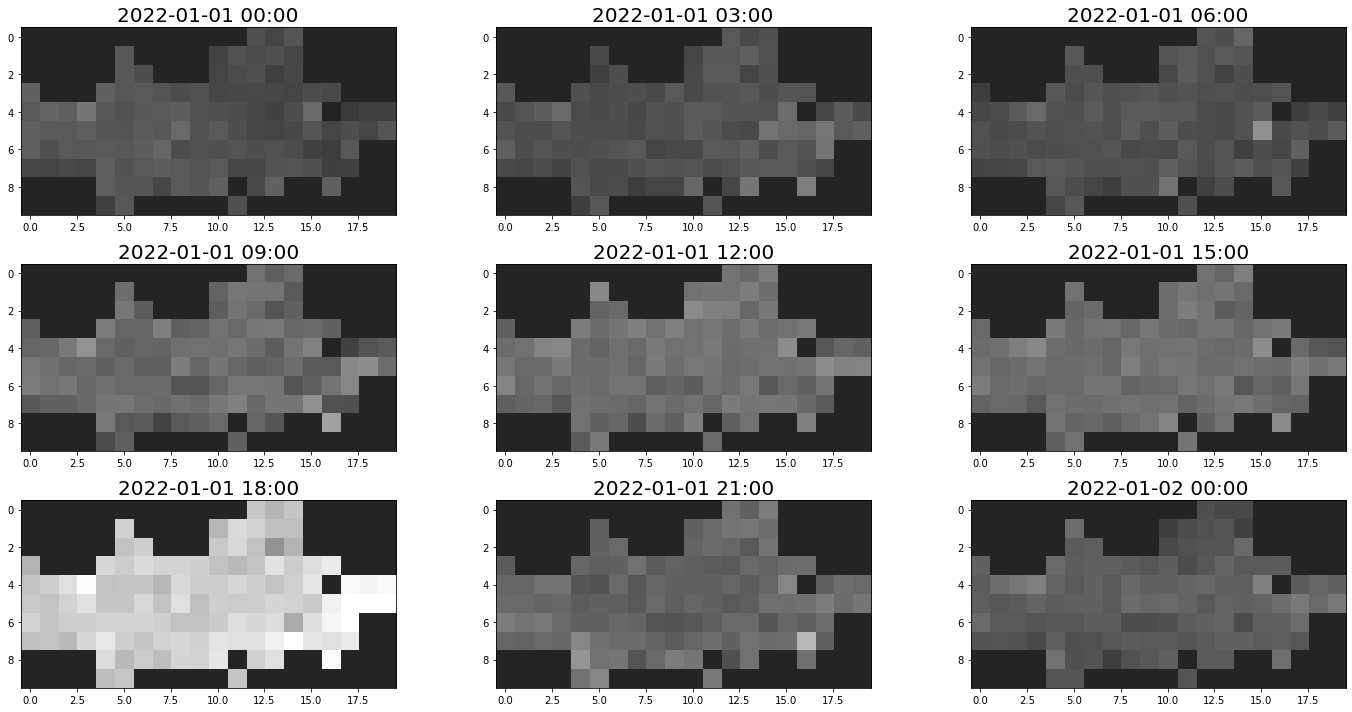

In [9]:
# vmax = train_image[0:48].max() # 252
vmax = 70
c = 10

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20,10))

ax1.imshow(train_image[0][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax1.set_title('2022-01-01 00:00', fontsize=20)

ax2.imshow(train_image[6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 03:00
ax2.set_title('2022-01-01 03:00', fontsize=20)

ax3.imshow(train_image[12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 06:00
ax3.set_title('2022-01-01 06:00', fontsize=20)

ax4.imshow(train_image[18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 09:00
ax4.set_title('2022-01-01 09:00', fontsize=20)

ax5.imshow(train_image[24][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 12:00
ax5.set_title('2022-01-01 12:00', fontsize=20)

ax6.imshow(train_image[30][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 15:00
ax6.set_title('2022-01-01 15:00', fontsize=20)

ax7.imshow(train_image[36][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 18:00
ax7.set_title('2022-01-01 18:00', fontsize=20)

ax8.imshow(train_image[42][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 21:00
ax8.set_title('2022-01-01 21:00', fontsize=20)

ax9.imshow(train_image[48][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 24:00
ax9.set_title('2022-01-02 00:00', fontsize=20)

plt.tight_layout()
plt.show()

In [23]:
np.save('./data_preprocessed/train_image_dust', train_image)

In [24]:
np.save('./data_preprocessed/test_image_dust', test_image)